In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest
from scipy.stats import chi2

from dGbyG.utils.ChemFunc import parse_equation

In [2]:
TrainingData_df = pd.read_csv('./data/TrainingData.csv')

mean_std = TrainingData_df.loc[:,'std'].mean()
mean_std

1.8134185518241839

In [3]:
Scale = []
for n, sem in zip(TrainingData_df.loc[:,'n'], TrainingData_df.loc[:,'SEM']):
    if np.isnan(sem):
        scale = mean_std
    else:
        scale = (sem**2 + mean_std**2/n)**0.5
    Scale.append(scale)
Scale = np.array(Scale)

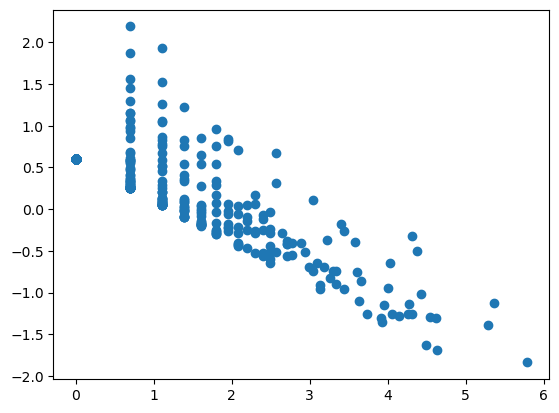

In [11]:
plt.scatter(np.log(TrainingData_df.loc[:,'n']), np.log(Scale))

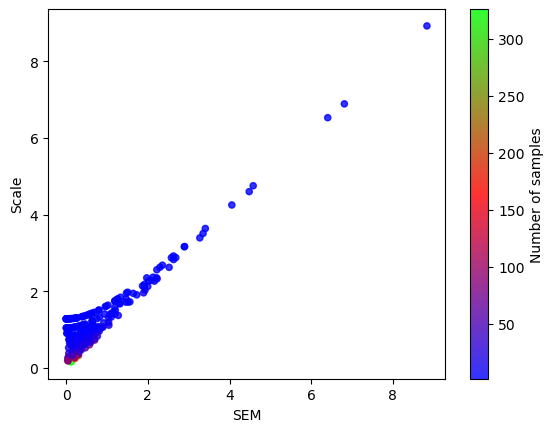

In [32]:
plt.scatter(TrainingData_df.loc[:,'SEM'], Scale, c=TrainingData_df.loc[:,'n'], cmap='brg', alpha=0.8, s=20)

plt.xlabel('SEM')
plt.ylabel('Scale')

cb = plt.colorbar()
cb.set_label('Number of samples')
plt.show()

In [4]:
Random_error = np.random.randn(TrainingData_df.shape[0], 200) * Scale.reshape(-1,1)

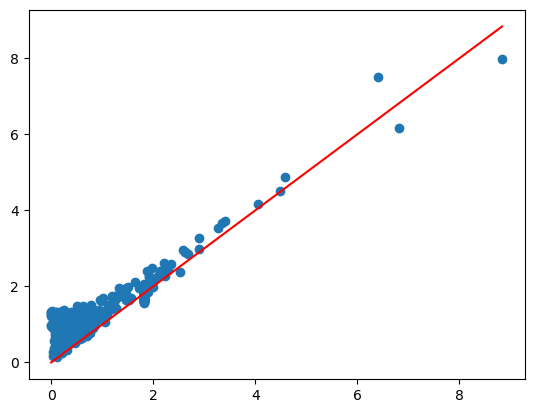

In [5]:
plt.scatter(np.nan_to_num(TrainingData_df.loc[:,'SEM'].to_numpy(), nan=mean_std), Random_error.std(axis=1))
plt.plot([0,TrainingData_df.loc[:,'SEM'].max()], [0,TrainingData_df.loc[:,'SEM'].max()], color='r')
plt.show()

In [14]:
max(Scale)

8.92670002088408

In [15]:
np.where(Scale==min(Scale))

(array([496]),)

In [16]:
TrainingData_df.loc[496,]

description                                       2 ADP(aq) = AMP(aq) + ATP(aq)
reaction                      2.0 [H]O[C@@]1([H])[C@@]([H])(O[H])[C@]([H])(n...
T                                                                        298.15
I                                                                          0.25
pH                                                                          7.0
pMg                                                                        14.0
standard_dg_prime                                                      2.208329
std                                                                    2.228566
n                                                                           326
SEM                                                                    0.123429
nontrans_standard_dg_prime                                             1.446008
nontrans_std                                                           1.371335
Name: 496, dtype: object

(0.0, 50.0)

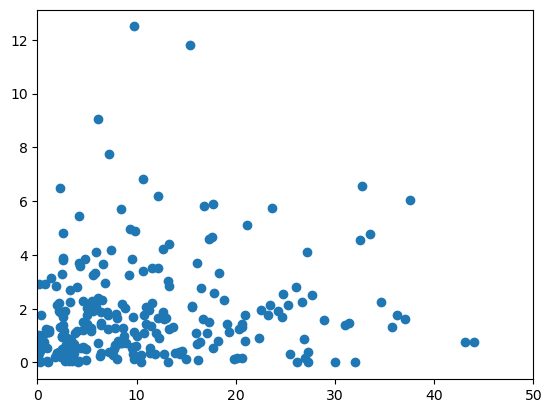

In [17]:
plt.scatter(TrainingData_df.loc[:,'standard_dg_prime'].abs(), TrainingData_df.loc[:,'std'], )
plt.xlim(0,50)

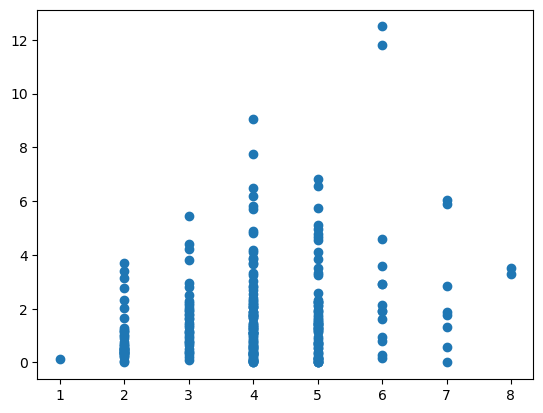

In [18]:
m = [len(parse_equation(r)) for r in TrainingData_df.loc[:,'reaction']]
plt.scatter(m, TrainingData_df.loc[:,'std'])

In [19]:
N = []
Mean_std = []
for n in set(TrainingData_df.loc[:,'n']):
    if n==1:
        continue
    N.append(n)
    std_n = TrainingData_df.loc[TrainingData_df.loc[:,'n']==n, 'std'].to_numpy()
    Mean_std.append(std_n.mean())
sum(Mean_std)/len(Mean_std)

2.004330777605538

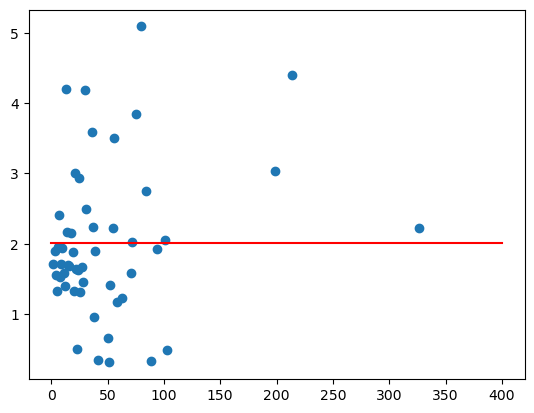

In [20]:
plt.scatter(N, Mean_std)
plt.plot([0,400], [sum(Mean_std)/len(Mean_std)]*2, color='r')
plt.show()

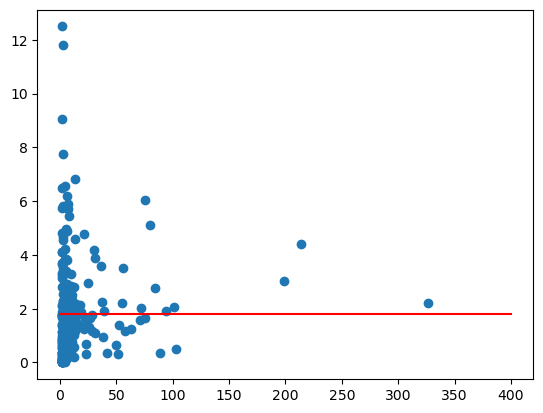

In [21]:
plt.scatter(TrainingData_df.loc[:,'n'], TrainingData_df.loc[:,'std'])
plt.plot([0,400], [TrainingData_df.loc[:,'std'].mean()]*2, color='r')
plt.show()

In [22]:
N = []
Mean_sem = []
for n in set(TrainingData_df.loc[:,'n']):
    if n==1:
        continue
    N.append(n)
    sem  = TrainingData_df.loc[TrainingData_df.loc[:,'n']==n, 'SEM'].to_numpy()
    Mean_sem.append(sem.mean())
sum(Mean_sem)/len(Mean_sem)

0.41680389406454654

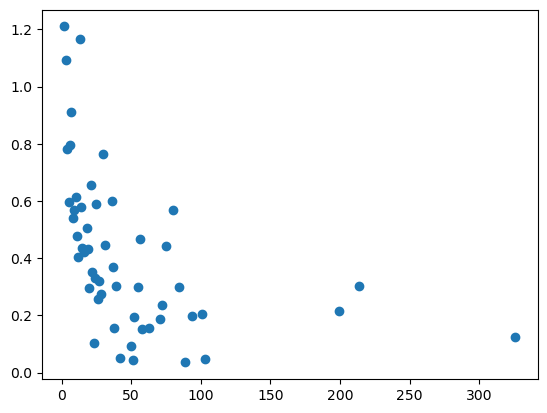

In [23]:
plt.scatter(N, Mean_sem)